MLTSA UDel PHYS667 Sprint 2020

HW1 Extra Credit :

Solve Exercise 1, 2, 3 from https://arxiv.org/pdf/1008.4686.pdf

In [253]:
import numpy as np 
import matplotlib.pylab as plt
import pandas as pd 

###This exercise relies primarily on the use of equation 5 in the paper. 

In [199]:
####Data was formated by Riley Clark
dh_dat = pd.DataFrame(np.array([[201,592,61,9,-0.84],
                            [244,401,25,4,0.31],
                            [47,583,38,11,0.64],
                            [287,402,15,7,-0.27],
                            [203,495,21,5,-0.33],
                            [58,173,15,9,0.67],
                            [210,479,27,4,-0.02],
                            [202,504,14,4,-0.05],
                            [198,510,30,11,-0.84],
                            [158,416,16,7,-0.69],
                            [165,393,14,5,0.30],
                            [201,442,25,5,-0.46],
                            [157,317,52,5,-0.03],
                            [131,311,16,6,0.50],
                            [166,400,34,6,0.73],
                            [160,337,31,5,-0.52],
                            [186,423,42,9,0.90],
                            [125,334,26,8,0.40],
                            [218,533,16,6,-0.78],
                            [146,344,22,5,-0.56]
                            ]),index=np.arange(1,21),columns=('x','y','s_y','s_x','rho_xy'))

In [281]:
####Constructing the arrays, based on the size of y. 
### we set y directrly from the data set, excluding the first 5 values. 
y_dat1 = dh_dat['y'][5:20].astype(float)

####The A matrix
A_1 = np.ones((y_dat1.size,2), dtype=float)
A_1[:,1] =dh_dat['x'][5:20].astype(float)
####The covariance matrix 
C_1 = np.zeros((y_dat1.size,y_dat1.size), dtype=float)

(15, 2)


In [264]:
####Putting the y_err into the diagonal of the covariance matrix.
for i in range(0, y_dat1.size): 
    C_1[i][i] = (dh_dat['s_y'][i + 5])**2.0


We then compute the linear algebraic expression from the paper, to get the two paramaters, slope and intercept. 

In [265]:
X = np.linalg.inv(A_1.T.dot(np.linalg.inv(C_1)).dot(A_1)).dot(A_1.T.dot(np.linalg.inv(C_1)).dot(y_dat1))
print('The slope is ' + str(X[1]))
print('The intercept is ' + str(X[0]))

#####Creating a linear fuction that uses the calculated  parameters 
def line_1(x, m1, b1): 
    return (m1 * x ) + b1 

The slope is 2.181397807857252
The intercept is 33.84671723631436


(0, 640)

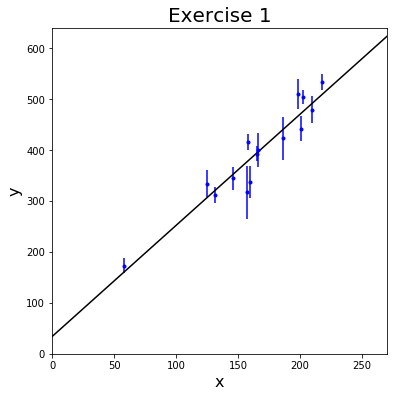

In [266]:
####plotting the points, errors, and the linear fit. 
x_arr = np.arange(0, 280, 10, dtype= float)
ax = plt.figure(figsize=(6,6)).add_subplot(111) 
ax.errorbar(dh_dat['x'][5:20], y_dat1, yerr= dh_dat['s_y'][5:20], fmt='.', c= 'b')
ax.plot(x_arr, line_1(x_arr, X[1], X[0]), c='k')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_title('Exercise 1', fontsize=20)
ax.set_xlim(0, 270) 
ax.set_ylim(0,640) 


Figure 1: Plotting of data from the table with the linear fit, with parameters found via the linear algebraic approach.  

In [276]:
####Finding the error of the slope 
##Using equation from page 5 in the paper. assuming the error in y are guassian. 
m_err = np.matmul(np.matmul(np.transpose(A_1), np.linalg.inv(C_1)), A_1)


###variances are the diagonal elements

print('Accroding the the algebraic solution the error in slope is  ' + str(m_err[0][0]))

Accroding the the algebraic solution the error in slope is  0.03703934347634931


Exercise 2 

In [205]:
####Constructing the arrays, based on the size of y. 
### we set y directrly from the data set, excluding the first 5 values. 
y_dat2 = dh_dat['y'].astype(float)

y_err = dh_dat['s_y'].astype(float)

A_2 = np.ones((y_dat2.size,2))
A_2[:,1] = dh_dat['x'].astype(float)

C_2 = np.zeros((y_dat2.size,y_dat2.size), dtype=float) 

###pulling the diagonal indices 
d2 = np.diag_indices(y_dat2.size)






In [207]:
####Putting the y_err into the diagonal of the covariance matrix.
C_2[d2] = (y_err)**2



In [222]:
X_2_l = np.linalg.inv(np.matmul(np.transpose(A_2),  np.matmul(np.linalg.inv(C_2),A_2)))
X_2_r =  np.matmul(np.transpose(A_2), np.matmul(np.linalg.inv(C_2), y_dat2))
X_2 = np.matmul(X_2_l, X_2_r)

print('The slope is ' + str(X_2[1]))
print('The intercept is ' + str(X_2[0]))    

The slope is 1.0767475241683258
The intercept is 213.27349197596095


(0, 640)

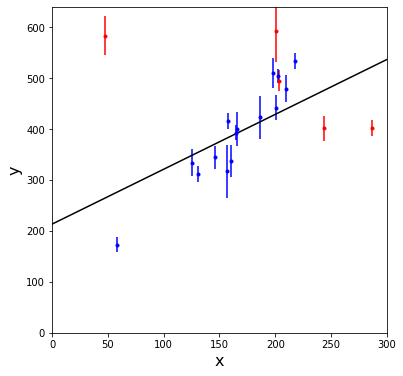

In [285]:
x_arr = np.arange(0, 310, 10, dtype= float)
ax = plt.figure(figsize=(6,6)).add_subplot(111) 
ax.errorbar(dh_dat['x'][0:5], y_dat2[0:5], yerr= dh_dat['s_y'][0:5], fmt='.', c= 'r')
ax.errorbar(dh_dat['x'][5:20], y_dat2[5:20], yerr= dh_dat['s_y'][5:20], fmt='.', c= 'b')
ax.plot(x_arr, line_1(x_arr, X_2[1], X_2[0]), c='k')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16) 
ax.set_xlim(0, 300) 
ax.set_ylim(0,640)


Figure 2: Similiar to figure 1, as well as in methodology, but the 5 intial data points are included, and a new fit is calculated. The newer data point in red, do not lie closely with the data from Exercise 1, but do not cause significant change to the slope parameter. 

Exerise 3 

In [237]:
###Exercise 3 has the same procedure a exercise 1, but we ass an extra column to A
A_3 = np.ones((y_dat1.size,3), dtype= float)
A_3[:,1] =dh_dat['x'][5:20].astype(float) 
A_3[:,2] = (dh_dat['x'][5:20].astype(float))**2.0




In [239]:
###We continue to use the other arrays from problem 1 to perform the linear algebraic operations. 
####I keep the operations grouped by tripple products. 
X_3_l = np.linalg.inv(np.matmul(np.transpose(A_3), np.matmul((np.linalg.inv(C_1)), (A_3))))
X_3_r = np.matmul(np.transpose(A_3), np.matmul(np.linalg.inv(C_1), (y_dat1)))
X_3  = np.matmul(X_3_l, X_3_r)                         

print('The slope is ' + str(X_3[1]))
print('The second order quadratic parameter ' + str(X_3[2]))
print('The intercept is ' + str(X_3[0]))   

The slope is 1.4803510519653855
The second order quadratic parameter 0.0024315422294987066
The intercept is 78.70543354391702


In [240]:
#####Creating a linear fuction that uses the calculated  parameters 
def quad_3(x, q3, m3, b3): 
    return (q3 * (x**2.0)) + (m3 * x ) + b3 

(0, 640)

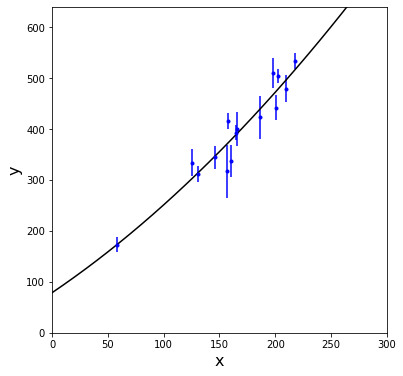

In [251]:
x_arr = np.arange(0, 310, 10)
ax = plt.figure(figsize=(6,6)).add_subplot(111) 
ax.errorbar(dh_dat['x'][5:20], y_dat1, yerr= dh_dat['s_y'][5:20], fmt='.', c= 'b')
ax.plot(x_arr, quad_3(x_arr, X_3[2], X_3[1], X_3[0]), c='k')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16) 
ax.set_xlim(0, 300) 
ax.set_ylim(0,640)

Figure 3: This involves the same data as in figure 1, but we solve for a quadratic solution in stead. In contrast to figure 1, it fall in closer proximity to more data points. 